In [1]:
from math import sin, pi
from fem.system import solve_system

import numpy as np

import matplotlib as mpl
mpl.use('Agg')

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Choose \\(a=1, b = 0, c = 1\\) then the equation becomes:
\\[
 -\nabla^2u + u = f
\\]

and choosing \\(u = \sin{(\pi x)}\sin{(\pi y)} we already know the exact solution and the above equation becomes:

\\[
 f = 2\pi^2\sin{(\pi x)}\sin{(\pi y)} + \sin{(\pi x)}\sin{(\pi y)}
\\]

### Define the Problem

In [24]:
def exact(x, y):
    return sin(pi * x) * sin(pi * y)

parameters = (1, [0,0], 1)

def known_nodes(v):
    return abs(v[0]) == 1 or abs(v[1]) == 1 or v[0] == 0 or v[1] == 0

def f(x, y):
    return (2*pi**2) * (sin(pi * x)) * (sin(pi * y)) +\
           1*sin(pi * x) * sin(pi * y)

### Solve the System

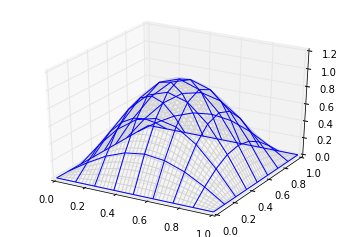

In [25]:
# Setup the axis to plot on
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the exact solution
X = np.linspace(0,1,128)
Y = np.linspace(0,1,128)
X, Y = np.meshgrid(X, Y)
Z = np.sin(pi * X) * np.sin(pi * Y)
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, color='lightgrey')

err = []

for N in [4, 8, 16, 32]:

    results = solve_system(parameters, known_nodes, f, N, exact)
    
    if N == 8:
        # Plot our approximation
        xs, ys = results['grid']
        U = results['U']
        ax.plot_wireframe(xs, ys, U, color='blue')
        
    err.append(results['err'])

In [26]:
results['U'].max()

1.0479630910871087